In [1]:
# !sudo apt-get install language-pack-id
# !sudo apt-get install language-pack-de-base

In [21]:
# !sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d.axes3d import Axes3D

from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec

from sklearn.linear_model import LinearRegression

In [22]:
import locale

locale.setlocale(locale.LC_ALL, 'de_DE.utf8')

plt.rcParams["font.family"] = 'DejaVu Sans'

plt.rcParams['axes.formatter.use_locale'] = True

plt.rcParams['text.usetex'] = True

In [14]:
def get_data(beta=0.1, l=200):
    np.random.seed(0)

    t = np.linspace(-1, 1, l)

    p = 0.3
    alpha = np.pi/2
    x0 = -1
    y0 = -1

    x=x1=((t**2)/(2*p))*np.cos(alpha)-t*np.sin(alpha)+x0
    y=y1=((t**2)/(2*p))*np.sin(alpha)+t*np.cos(alpha)+y0
    X = np.vstack([x*y, y**2, x, y, np.ones_like(x)]).T
    Y = x**2
    w1 = np.linalg.inv(X.T@X)@X.T@Y
    x1 += beta*np.random.randn(l)
    y1 += beta*np.random.randn(l)


    p = 0.3
    alpha = -np.pi/2
    x0 = 1
    y0 = 1
    x=x2=((t**2)/(2*p))*np.cos(alpha)-t*np.sin(alpha)+x0
    y=y2=((t**2)/(2*p))*np.sin(alpha)+t*np.cos(alpha)+y0
    X = np.vstack([x*y, y**2, x, y, np.ones_like(x)]).T
    Y = x**2
    w2 = np.linalg.inv(X.T@X)@X.T@Y
    x2 += beta*np.random.randn(l)
    y2 += beta*np.random.randn(l)


    x = np.hstack([x1, x2])
    y = np.hstack([y1, y2])
    
    _type = np.hstack([0*np.ones_like(x1), 1*np.ones_like(x2)])
    
    return x, y, w1, w2, _type

In [15]:
x, y, w1, w2, _type = get_data(beta=0.01, l=25)

In [16]:
X = np.vstack([x*y, y**2, x, y, np.ones_like(x)]).T
Z = x**2

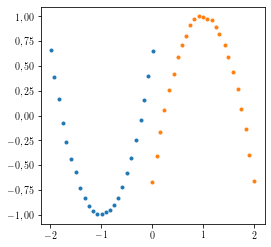

In [23]:
fig = plt.figure(figsize=(4,4))


for i in np.unique(_type):
    plt.plot(x[_type==i], y[_type==i], '.')

plt.show()

In [24]:
feature_2d = PCA(n_components= 2).fit_transform(X)

In [25]:
models = []
for i in np.unique(_type):
    model = LinearRegression()
    model.fit(feature_2d[_type==i], Z[_type==i])
    models.append(model)

In [26]:
X0, Y0 = np.meshgrid(
    np.linspace(
            int(np.min(feature_2d[:,0]))+1, 
            int(np.max(feature_2d[:,0]))+1, 2),
    np.linspace(
            int(np.min(feature_2d[:,1]))+0.3, 
            int(np.max(feature_2d[:,1]))+0.3, 2))

X1, Y1 = np.meshgrid(
    np.linspace(
            int(np.min(feature_2d[:,0]))-1, 
            int(np.max(feature_2d[:,0]))-1, 2),
    np.linspace(
            int(np.min(feature_2d[:,1]))+0.3, 
            int(np.max(feature_2d[:,1]))+0.3, 2))

new_X = [X0, X1]
new_Y = [Y0, Y1]
new_Z = [np.zeros_like(X0) for _ in np.unique(_type)]

for j in np.unique(_type):
    for i in range(len(X0)):
        new_Z[int(j)][i] = models[int(j)].predict(np.vstack([new_X[int(j)][i], new_Y[int(j)][i]]).T)

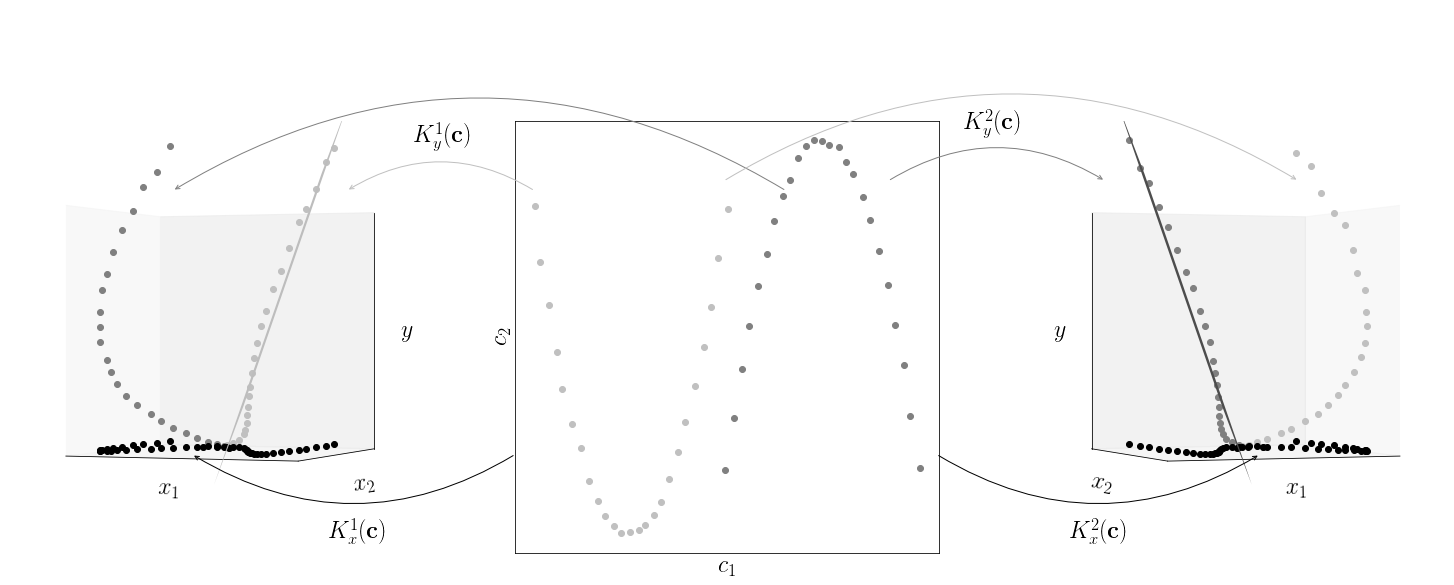

In [30]:
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.labelsize'] = 24
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
markersize = 6
alpha = 1.0
#################################################

colors = ['silver', 'grey', 'black']

fig = plt.figure(figsize=(20.0, 6.0), frameon=True)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

ax = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(133, projection='3d')
ax3 = fig.add_subplot(132)

ax.plot_surface(new_X[0], new_Y[0], new_Z[0], color = colors[0], alpha=alpha)

for i in np.unique(_type):
    ax.plot(
        feature_2d[_type==i,0], 
        feature_2d[_type==i,1], 
        Z[_type==i], 
        'o', 
        color = colors[int(i)], 
        markersize=markersize, 
        label='$K_y^1$')
    
ax.plot(
    feature_2d[:, 0], 
    feature_2d[:, 1], 
    Z*0, 
    'o', 
    color = colors[2], 
    markersize=markersize, 
    label='$K_x^1$')
    
ax2.plot_surface(new_X[1], new_Y[1], new_Z[1], color = colors[1], alpha=alpha)

for i in np.unique(_type):
    ax2.plot(
        feature_2d[_type==i,0], 
        feature_2d[_type==i,1], 
        Z[_type==i], 
        'o', 
        color = colors[int(i)], 
        markersize=markersize, 
        label='$K_y^2$')
    
ax2.plot(
    feature_2d[:, 0], 
    feature_2d[:, 1], 
    Z*0, 
    'o', 
    color = colors[2], 
    markersize=markersize, 
    label='$K_x^2$')
    
    
for i in np.unique(_type):
    ax3.plot(
        x[_type==i], 
        y[_type==i], 
        '.', 
        color = colors[int(i)], 
        markersize=2*markersize, 
        label='figure {}'.format(int(i)+1))



ax.view_init(0, -69)
ax.set_zlim((0,3))

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

ax2.view_init(0, -111)
ax2.set_zlim((0,3))

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])

ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$y$')

ax3.set_xticks([])
ax3.set_yticks([])

ax3.set_xlabel('$c_1$')
ax3.set_ylabel('$c_2$')


# Первый эксперт
con1 = ConnectionPatch(xyA=(-2,0.75), coordsA=ax3.transData,
                       xyB=(-3.9,0.75), coordsB=ax3.transData,
                       connectionstyle='arc3,rad=0.3', arrowstyle='->', color=colors[0])
con2 = ConnectionPatch(xyA=(0.6,0.75), coordsA=ax3.transData,
                       xyB=(-5.7,0.75), coordsB=ax3.transData,
                       connectionstyle='arc3,rad=0.3', arrowstyle='->', color=colors[1])
con3 = ConnectionPatch(xyA=(-2.2, -0.6), coordsA=ax3.transData,
                       xyB=(-5.5,-0.6), coordsB=ax3.transData,
                       connectionstyle='arc3,rad=-0.3', arrowstyle='->', color=colors[2])

fig.add_artist(con1)
fig.add_artist(con2)
fig.add_artist(con3)

ax3.text(-0.1, 0.93, '$K_y^1(\mathbf{c})$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        fontsize=24)
ax3.text(-0.3, 0.02, '$K_x^1(\mathbf{c})$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        fontsize=24)

# Второй эксперт
con4 = ConnectionPatch(xyA=(1.7,0.8), coordsA=ax3.transData,
                       xyB=(3.9,0.8), coordsB=ax3.transData,
                       connectionstyle='arc3,rad=-0.3', arrowstyle='->', color=colors[1])
con5 = ConnectionPatch(xyA=(0.0,0.8), coordsA=ax3.transData,
                       xyB=(5.9,0.8), coordsB=ax3.transData,
                       connectionstyle='arc3,rad=-0.3', arrowstyle='->', color=colors[0])
con6 = ConnectionPatch(xyA=(2.2,-0.6), coordsA=ax3.transData,
                       xyB=(5.5,-0.6), coordsB=ax3.transData,
                       connectionstyle='arc3,rad=0.3', arrowstyle='->', color=colors[2])

fig.add_artist(con4)
fig.add_artist(con5)
fig.add_artist(con6)

ax3.text(1.2, 0.96, '$K_y^2(\mathbf{c})$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        fontsize=24)
ax3.text(1.45, 0.02, '$K_x^2(\mathbf{c})$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        fontsize=24)

# ax.set_title('(a)', y=-0.15)
# ax3.set_title('(b)', y=-0.15)
# ax2.set_title('(c)', y=-0.15)

plt.savefig('explanation.pdf', bbox_inches='tight')
plt.show()

## отдельные изображения

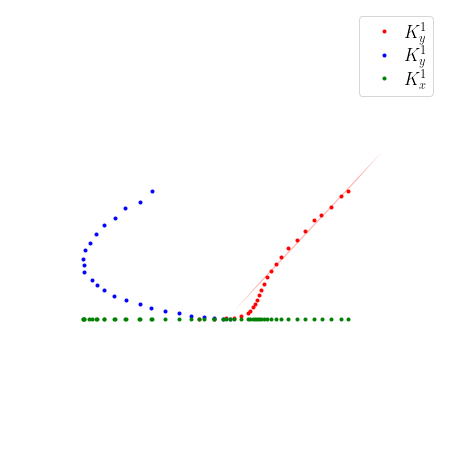

In [ ]:
plt.rcParams['legend.fontsize'] = 18
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

colors = ['red', 'blue', 'green']

fig = plt.figure(figsize=(8.0, 8.0), frameon=False)

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, new_Z[0], color = colors[0], alpha=0.3)

for i in np.unique(_type):
    ax.plot(
        feature_2d[_type==i, 0], 
        feature_2d[_type==i,1 ], 
        Z[_type==i], 
        'o', 
        color = colors[int(i)], 
        markersize=3, 
        label='$K_y^1$')
    
ax.plot(
    feature_2d[:, 0], 
    feature_2d[:, 1], 
    Z*0, 
    'o', 
    color = colors[2], 
    markersize=3, 
    label='$K_x^1$')
    

ax.view_init(-2.5, -70)
ax.set_zlim((0,6))
ax.axis('off')

ax.legend(loc='best')

plt.savefig('./figures/explanation_exp1.pdf', bbox_inches='tight')
plt.show()

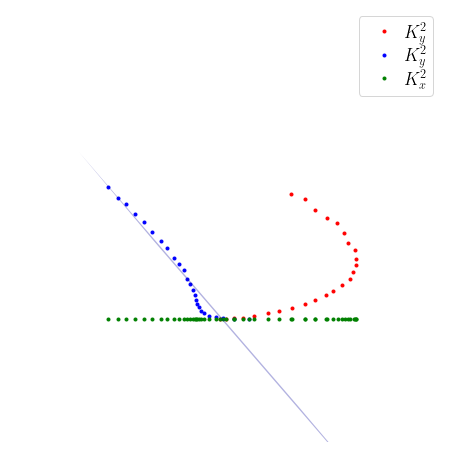

In [ ]:
plt.rcParams['legend.fontsize'] = 18
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

colors = ['red', 'blue', 'green']

fig = plt.figure(figsize=(8.0, 8.0), frameon=False)

ax2 = fig.add_subplot(111, projection='3d')

ax2.plot_surface(X, Y, new_Z[1], color = colors[1], alpha=0.3)

for i in np.unique(_type):
    ax2.plot(
        feature_2d[_type==i, 0], 
        feature_2d[_type==i,1 ], 
        Z[_type==i], 
        'o', 
        color = colors[int(i)], 
        markersize=3, 
        label='$K_y^2$')
    
ax2.plot(
    feature_2d[:, 0], 
    feature_2d[:, 1], 
    Z*0, 
    'o', 
    color = colors[2], 
    markersize=3, 
    label='$K_x^2$')
    
    
ax2.view_init(-2.5, -110)
ax2.set_zlim((0,6))
ax2.axis('off')

ax2.legend(loc='best')
plt.savefig('./figures/explanation_exp2.pdf', bbox_inches='tight')
plt.show()

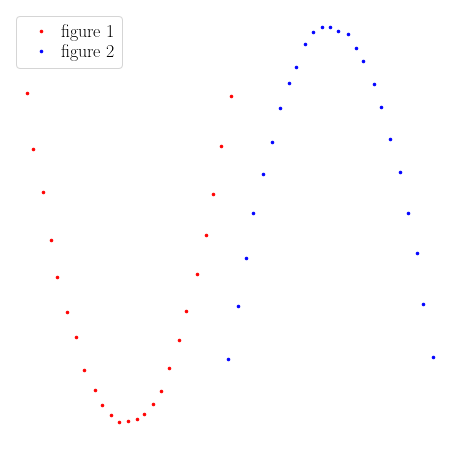

In [ ]:
plt.rcParams['legend.fontsize'] = 18
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

colors = ['red', 'blue', 'green']

fig = plt.figure(figsize=(8.0, 8.0))

ax3 = fig.add_subplot(111)    
    
for i in np.unique(_type):
    ax3.plot(
        x[_type==i], 
        y[_type==i], 
        '.', 
        color = colors[int(i)], 
        markersize=5, 
        label='figure {}'.format(int(i)+1))


ax3.axis('off')
ax3.legend(loc='best')
plt.savefig('./figures/explanation.pdf', bbox_inches='tight')
plt.show()